In [2]:
import xarray as xr
import netCDF4 as nc
import numpy as np
from scipy.io import netcdf

import dash
import dash_core_components as dcc
import dash_html_components as html

import matplotlib
from __future__ import print_function
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import matplotlib.animation as anim
import cartopy
from IPython.display import HTML
from PIL import Image
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.cm import unregister_cmap
import os
import ecrlisca.environment
import glob
import time

In [308]:
tmp['vor'].values.max()

7.581669e-05

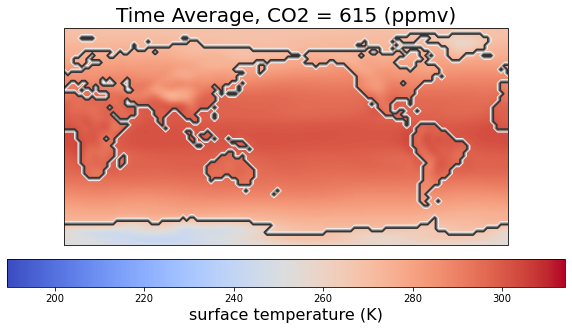

In [105]:
get_avg_field(data)

In [116]:
files = ['/home/ec2-user/environment/isca_aws/experiments/input/land_masks/era_land_t42.nc']
data = get_data(files,'zsurf',None,exp=None)

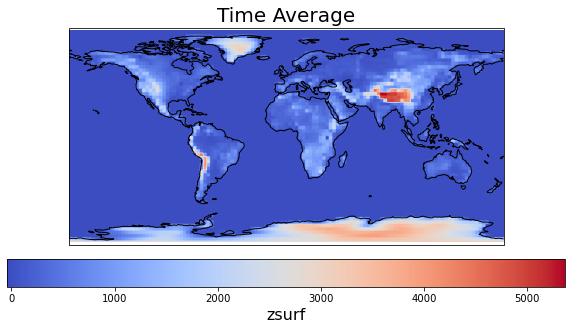

In [134]:
get_avg_field(data,exp=None)

In [45]:
data = xr.open_mfdataset('../../experiments/input/co2_1x_continents_10Ma.nc',decode_times=False)

In [44]:
!pwd

/home/ec2-user/environment/isca_aws/ecrlisca/postprocessing


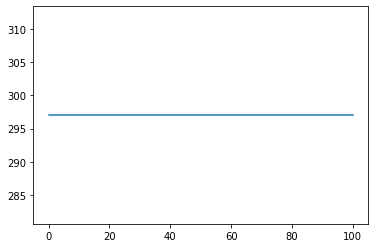

In [46]:
plt.plot(data['co2'].values[:,0,:,0])
#plt.plot(data['co2'].values[:,1,0,0])

In [13]:
data['co2'].values[0,0,:,0]

array([300.], dtype=float32)

In [7]:
!pwd

/home/ec2-user/environment/isca_aws/ecrlisca/postprocessing


In [21]:
f = open('../data/co2.txt','r')

In [22]:
lines = f.readlines()

In [23]:
lines = [l.strip('\n').split() for l in lines]

In [25]:
lines[0]

296.39103

In [43]:
f = open('../data/co2.py','w')
f.write('series = ')

9

In [32]:
import json

In [36]:
f.write('series='+json.dumps(lines))

1152

In [34]:
!pwd

/home/ec2-user/environment/isca_aws/ecrlisca/postprocessing


In [37]:
f.write('series=')

7

In [42]:
json.dump(lines,f)

In [50]:
1/(1+0.4*(0.55)/4.7)

0.9552845528455285

In [58]:
a = {3:2,1:4}

b = sorted(a)

In [59]:
b

[1, 3]

In [124]:
from ecrlisca.preprocessing.utils import adjust_continents,interpolate_land,get_original_map_data,adjust_co2,interpolate_co2,land_years
from ecrlisca.data.co2 import series as co2series

In [125]:
tmp = adjust_continents(land_year=0.02,sea_level=-100.0)

/home/ec2-user/environment/isca_aws/experiments/input/land_masks/continents_0.02Ma.nc


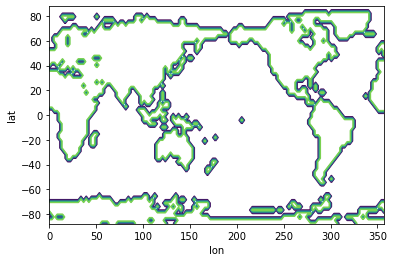

In [126]:
tmp['land_mask'].plot.contour()

In [2]:
adjust_co2(land_year="22Ma")

In [6]:
'22'.strip('Ma')

'22'

In [9]:
keys = sorted([float(k) for k in co2series.keys()])

In [45]:
import xarray as xr
from ecrlisca.preprocessing.utils import regrid_continent_data
import glob
import numpy as np
file = glob.glob('../../experiments/input/land_masks/raw/Map*_10Ma.nc')
land = xr.open_mfdataset(file,decode_times=False)
tmp = land['z'].values
tmp[tmp<-40]=0
land['land_mask'] = (land['z'].dims,np.array(tmp>0,dtype=float))
#land = regrid_continent_data(land,land_year=10)

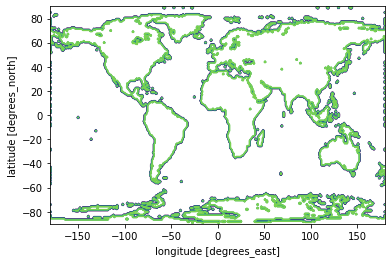

In [46]:
land['land_mask'].plot.contour()

In [46]:
tmp = np.zeros(land['z'].values.shape)
tmp = land['z'].values
tmp[tmp<0]=0
land['z'] = (land['z'].dims,tmp)

In [122]:
import xesmf as xe

base = xr.open_mfdataset(os.environ.get('BASE_TOPO_FILE'))
 
ds_out = xr.Dataset({'lat': (['lat'], base['lat'].values),
                     'lon': (['lon'], base['lon'].values)})

regridder = xe.Regridder(land, ds_out, 'bilinear')
ds_out = regridder(land)
ds_out['land_mask'] = (ds_out['z'].dims,np.array(ds_out['z'].values > -100.0,dtype=float))

/data/team/conda/envs/isca_env/lib/python3.9/site-packages/xesmf/frontend.py:555: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  ds_out = xr.apply_ufunc(


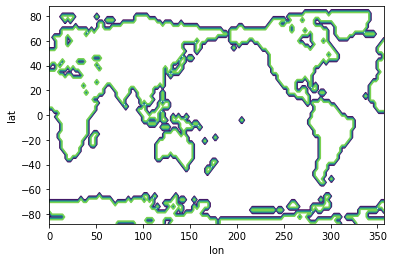

In [48]:
ds_out['land_mask'].plot.contour()

In [116]:
file = glob.glob(os.environ.get('RAW_TOPO_DIR')+'/Map*_0Ma.nc')
land = xr.open_mfdataset(file,decode_times=False)

In [119]:
land['land_mask'] = (land['z'].dims,np.array(land['z'].values > -100,dtype=float))

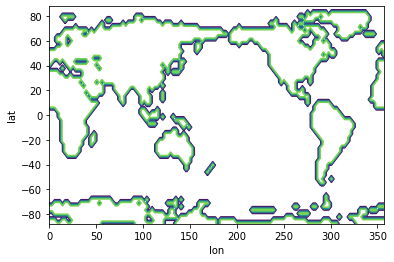

In [44]:
land['land_mask'].plot.contour()

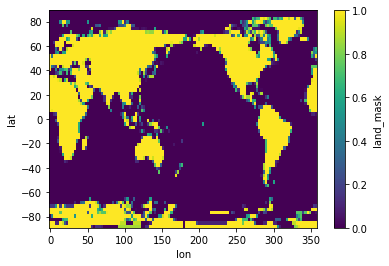

In [40]:
ds_out['land_mask'].plot.imshow()

In [34]:
!pwd

/home/ec2-user/environment/isca_aws/ecrlisca/postprocessing


In [40]:
tmp['co2'].values.mean()

514.4144

In [28]:
tmp['co2'].units

'ppmv'

In [8]:
from ecrlisca.preprocessing.utils import interpolate_co2

In [26]:
val = interpolate_co2('500Ma')

In [27]:
val

5667.567

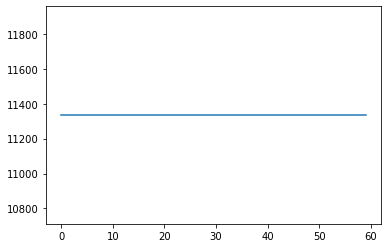

In [32]:
plt.plot(tmp['co2'])

In [42]:
land = get_original_map_data('55Ma')

OSError: no files to open

In [98]:
import ecrlisca.environment
import os

In [99]:
file = glob.glob(os.environ.get("TOPO_DIR")+'/continents_55Ma.nc')

In [100]:
land = xr.

['/home/ec2-user/environment/isca_aws/experiments/input/land_masks//continents_55Ma.nc']

In [10]:
from ecrlisca.data.co2 import series as co2series

In [12]:
co2series['5']

KeyError: '5'

In [1]:
from ecrlisca.preprocessing.utils import interpolate_co2

In [6]:
interpolate_co2(10.0)

297.0339

In [12]:
from ecrlisca.data.co2 import series

In [18]:
series[50.0]

953.0927999999999

In [15]:
keys = sorted(series)

In [16]:
kf = [float(k) for k in keys]

In [19]:
str(1.0)

'1.0'

SyntaxError: cannot assign to literal (3542556914.py, line 1)

In [11]:
series[0.0]

NameError: name 'series' is not defined

In [22]:
20000/10**6

0.02

In [133]:
from ecrlisca.experiment import Experiment
import os
tmp = xr.open_mfdataset(os.environ.get('TOPO_DIR')+'/'+Experiment(land_year=0.02).land_file)

In [130]:
Experiment(land_year=0.02).land_file

'continents_0.02Ma.nc'

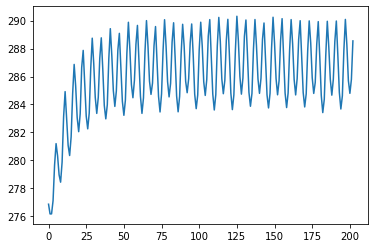

In [96]:
import matplotlib.pyplot as plt
plt.plot(tmp)

In [136]:
from ecrlisca.misc.utils import land_years
land_years

[0,
 5,
 10,
 15,
 20,
 25,
 30,
 35,
 40,
 45,
 50,
 55,
 60,
 65,
 70,
 75,
 80,
 85,
 90,
 95,
 100,
 105,
 110,
 115,
 120,
 125,
 130,
 135,
 140,
 145,
 150,
 155,
 160,
 165,
 170,
 175,
 180,
 185,
 190,
 195,
 200,
 205,
 210,
 215,
 220,
 225,
 230,
 235,
 240,
 245,
 250,
 255,
 260,
 265,
 270,
 275,
 280,
 285,
 290,
 295,
 300,
 305,
 310,
 315,
 320,
 325,
 330,
 335,
 340,
 345,
 350,
 355,
 360,
 365,
 370,
 375,
 380,
 385.2,
 390.5,
 395,
 400,
 405,
 410,
 415,
 420,
 425,
 430,
 435,
 440,
 445,
 450,
 455,
 460,
 465,
 470,
 475,
 480,
 485,
 490,
 495,
 500,
 505,
 510,
 515,
 520,
 525,
 530,
 535,
 540]

In [141]:
a=land_years.index(10.0)

In [135]:
tmp = adjust_continents(land_year=10.0)

OSError: no files to open

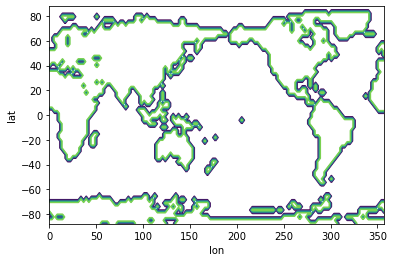

In [132]:
tmp['land_mask'].plot.contour()

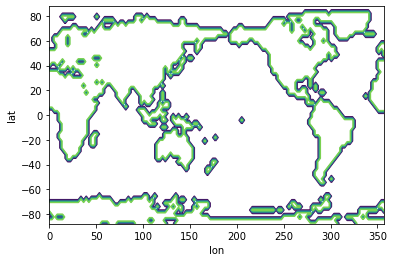

In [134]:
tmp['land_mask'].plot.contour()

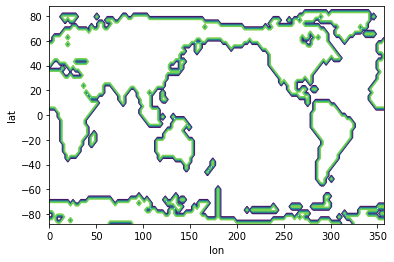

In [123]:
ds_out['land_mask'].plot.contour()

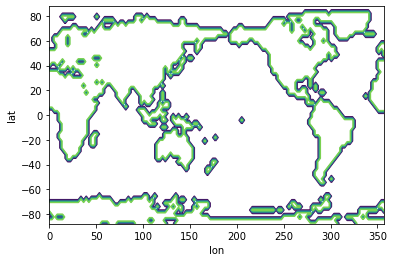

In [112]:
tmp['land_mask'].plot.contour()

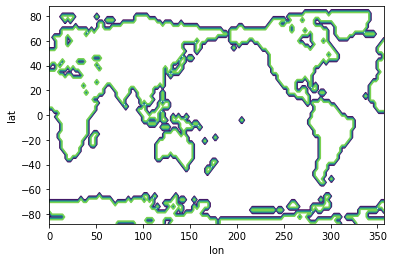

In [114]:
tmp['land_mask'].plot.contour()

In [2]:
from ecrlisca.preprocessing.utils import adjust_continents,land_years

/home/ec2-user/environment/isca_aws/experiments/input/land_masks/continents_49Ma.nc


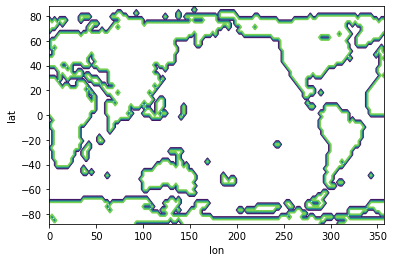

In [6]:
tmp = adjust_continents(land_year=49)
tmp['land_mask'].plot.contour()

In [142]:
import glob
files = glob.glob('/data/bnb32/gfdl_data/bucket_test_experiment/run*/atmos_monthly.nc')
#files = glob.glob('/data/bnb32/gfdl_data/variable_co2_1x_continents_5Ma_experiment/run*/atmos_monthly.nc')

In [143]:
import xarray as xr
data = xr.open_mfdataset(files)

In [103]:
data

<xarray.Dataset>
Dimensions:            (lon: 128, lonb: 129, lat: 64, latb: 65, time: 120, nv: 2, phalf: 26, pfull: 25, scalar_axis: 1)
Coordinates:
  * lon                (lon) float64 0.0 2.812 5.625 8.438 ... 351.6 354.4 357.2
  * lonb               (lonb) float64 -1.406 1.406 4.219 ... 353.0 355.8 358.6
  * lat                (lat) float64 -87.86 -85.1 -82.31 ... 82.31 85.1 87.86
  * latb               (latb) float64 -90.0 -86.58 -83.76 ... 83.76 86.58 90.0
  * time               (time) object 0001-01-16 00:00:00 ... 0010-12-16 00:00:00
  * nv                 (nv) float64 1.0 2.0
  * phalf              (phalf) float64 0.0 11.77 19.67 ... 977.8 989.7 1e+03
  * pfull              (pfull) float64 4.329 15.55 25.36 ... 970.2 983.8 994.9
  * scalar_axis        (scalar_axis) float64 0.0
Data variables: (12/21)
    ps                 (time, lat, lon) float32 dask.array<chunksize=(1, 64, 128), meta=np.ndarray>
    bk                 (time, phalf) float32 dask.array<chunksize=(1, 26), meta=np.ndarray>
    pk                 (time, phalf) float32 dask.array<chunksize=(1, 26), meta=np.ndarray>
    bucket_depth       (time, lat, lon) float32 dask.array<chunksize=(1, 64, 128), meta=np.ndarray>
    zsurf              (time, lat, lon) float32 dask.array<chunksize=(1, 64, 128), meta=np.ndarray>
    precipitation      (time, lat, lon) float32 dask.array<chunksize=(1, 64, 128), meta=np.ndarray>
    ...                 ...
    div                (time, pfull, lat, lon) float32 dask.array<chunksize=(1, 25, 64, 128), meta=np.ndarray>
    co2                (time, scalar_axis) float32 dask.array<chunksize=(1, 1), meta=np.ndarray>
    average_T1         (time) object dask.array<chunksize=(1,), meta=np.ndarray>
    average_T2         (time) object dask.array<chunksize=(1,), meta=np.ndarray>
    average_DT         (time) timedelta64[ns] dask.array<chunksize=(1,), meta=np.ndarray>
    time_bounds        (time, nv) timedelta64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
Attributes:
    filename:   /data/bnb32/gfdl_work/experiment/variable_co2_1x_continents_5...
    title:      FMS Model results
    grid_type:  regular
    grid_tile:  N/A

In [144]:
import matplotlib.pyplot as plt
avg = data['bucket_depth'].values.mean()
data['bucket_depth'] = (data['bucket_depth'].dims,data['bucket_depth'].values-avg)

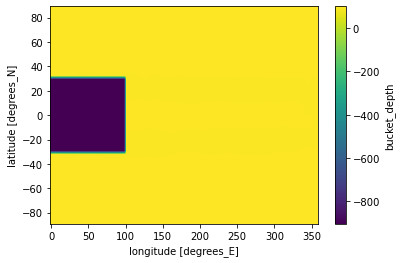

In [145]:
data['bucket_depth'].mean(dim='time').plot.imshow(interpolation='bilinear',vmin=data['bucket_depth'].values.min(),vmax=data['bucket_depth'].values.max())

In [94]:
data

<xarray.Dataset>
Dimensions:        (lon: 128, lonb: 129, lat: 64, latb: 65, time: 14, nv: 2, phalf: 41, pfull: 40)
Coordinates:
  * lon            (lon) float64 0.0 2.812 5.625 8.438 ... 351.6 354.4 357.2
  * lonb           (lonb) float64 -1.406 1.406 4.219 7.031 ... 353.0 355.8 358.6
  * lat            (lat) float64 -87.86 -85.1 -82.31 -79.53 ... 82.31 85.1 87.86
  * latb           (latb) float64 -90.0 -86.58 -83.76 ... 83.76 86.58 90.0
  * time           (time) object 0001-01-16 00:00:00 ... 0002-02-16 00:00:00
  * nv             (nv) float64 1.0 2.0
  * phalf          (phalf) float64 0.0 0.07368 0.2651 ... 895.8 946.5 1e+03
  * pfull          (pfull) float64 0.0271 0.1596 0.5078 ... 871.8 921.0 973.1
Data variables: (12/16)
    ps             (time, lat, lon) float32 dask.array<chunksize=(1, 64, 128), meta=np.ndarray>
    bk             (time, phalf) float32 dask.array<chunksize=(1, 41), meta=np.ndarray>
    pk             (time, phalf) float32 dask.array<chunksize=(1, 41), meta=np.ndarray>
    precipitation  (time, lat, lon) float32 dask.array<chunksize=(1, 64, 128), meta=np.ndarray>
    bucket_depth   (time, lat, lon) float32 96.57 96.57 96.57 ... 96.78 96.78
    t_surf         (time, lat, lon) float32 dask.array<chunksize=(1, 64, 128), meta=np.ndarray>
    ...             ...
    vor            (time, pfull, lat, lon) float32 dask.array<chunksize=(1, 40, 64, 128), meta=np.ndarray>
    div            (time, pfull, lat, lon) float32 dask.array<chunksize=(1, 40, 64, 128), meta=np.ndarray>
    average_T1     (time) object dask.array<chunksize=(1,), meta=np.ndarray>
    average_T2     (time) object dask.array<chunksize=(1,), meta=np.ndarray>
    average_DT     (time) timedelta64[ns] dask.array<chunksize=(1,), meta=np.ndarray>
    time_bounds    (time, nv) timedelta64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
Attributes:
    filename:   /data/bnb32/gfdl_work/experiment/bucket_test_experiment/run/a...
    title:      FMS Model results
    grid_type:  regular
    grid_tile:  N/A

In [96]:
import numpy as np
tmp = 28.2+55.8*np.exp(0.1813*(data['t_surf'].values-30.0-273.15))

In [100]:
np.multiply(np.array(np.array([0,1]) < 1,dtype=float),[1,2])

array([1., 0.])

In [104]:
float('0.02')

0.02

In [1]:
import numpy as np

In [2]:
np.pi

3.141592653589793

In [3]:
np.arcsin(1)

1.5707963267948966

In [1]:
from ecrlisca.preprocessing.utils import obliquity,eccentricity

In [6]:
eccentricity(0.02)

0.0068304719960621645

In [1]:
from ecrlisca.data.series import ecc_series

In [3]:
0 in ecc_series

True